In [1]:
from Model3 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

initial_model_state = copy.deepcopy(model) 
for j in range(300):
    model.step()

There are 0 agents unassigned!!
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
shock is happening!!
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!


In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,Average_Livelihood,Num_household_members,Migrated_households,Migrated_members,Migrated_individuals,Died agents,Child births
0,0.000000,1000,0,0,0,0,0
1,0.000000,1000,0,0,0,0,0
2,0.000000,1000,0,0,0,0,0
3,0.000000,1000,0,0,0,0,0
4,0.000000,1000,0,0,0,0,0
...,...,...,...,...,...,...,...
295,0.718806,724,80,314,22,109,169
296,0.718806,724,80,314,22,109,169
297,0.718806,724,80,314,22,109,169
298,0.718806,724,80,314,22,109,169


In [4]:
agent_data = model.datacollector.get_agent_vars_dataframe()

agent_savings = agent_data[agent_data['Savings'].notna()]
agent_savings


Crop_type Land_category       Savings  too low income  \
Step AgentID                                                             
1    1001             Rice         small  2.000000e+07             NaN   
     1002             Rice         small  2.000000e+07             NaN   
     1003             Rice         large  2.000000e+07             NaN   
     1004     Annual crops        medium  2.000000e+07             NaN   
     1005     Annual crops        medium  2.000000e+07             NaN   
...                    ...           ...           ...             ...   
300  1273             None          None  3.794661e+09             0.0   
     1274             None          None  6.608208e+09             0.0   
     1275             None          None  3.055839e+09             0.0   
     1276             None          None  6.120547e+09             0.0   
     1277             None          None  3.307563e+09             0.0   

              Number_of_wage_workers  
Step AgentID                          
1    1001                        NaN  
     1002                        NaN  
     1003                        NaN  
     1004                        NaN  
     1005                        NaN  
...                              ...  
300  1273                        NaN  
     1274                        NaN  
     1275                        NaN  
     1276                        NaN  
     1277                        NaN  

[62623 rows x 5 columns]

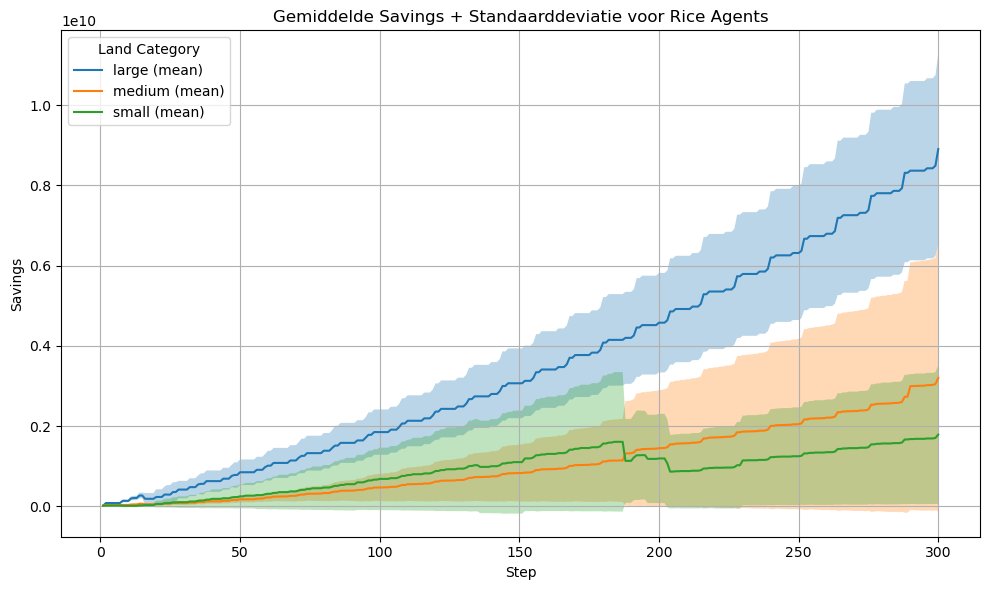

In [5]:
iksnaphetniet = agent_data
import matplotlib.pyplot as plt
import pandas as pd


# Zorg dat 'Step' een kolom is
iksnaphetniet = iksnaphetniet.reset_index()

# Filter alleen Rice agents
rice_df = iksnaphetniet[iksnaphetniet["Crop_type"] == "Rice"]

# Groepeer per Step en Land_category
mean_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].mean().unstack()
std_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].std().unstack()

# Plot met standaarddeviatie als shaded area
plt.figure(figsize=(10,6))
for category in mean_savings.columns:
    mean = mean_savings[category]
    std = std_savings[category]
    
    plt.plot(mean.index, mean.values, label=f"{category} (mean)")
    plt.fill_between(mean.index, mean - std, mean + std, alpha=0.3)

plt.title("Gemiddelde Savings + Standaarddeviatie voor Rice Agents")
plt.xlabel("Step")
plt.ylabel("Savings")
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()




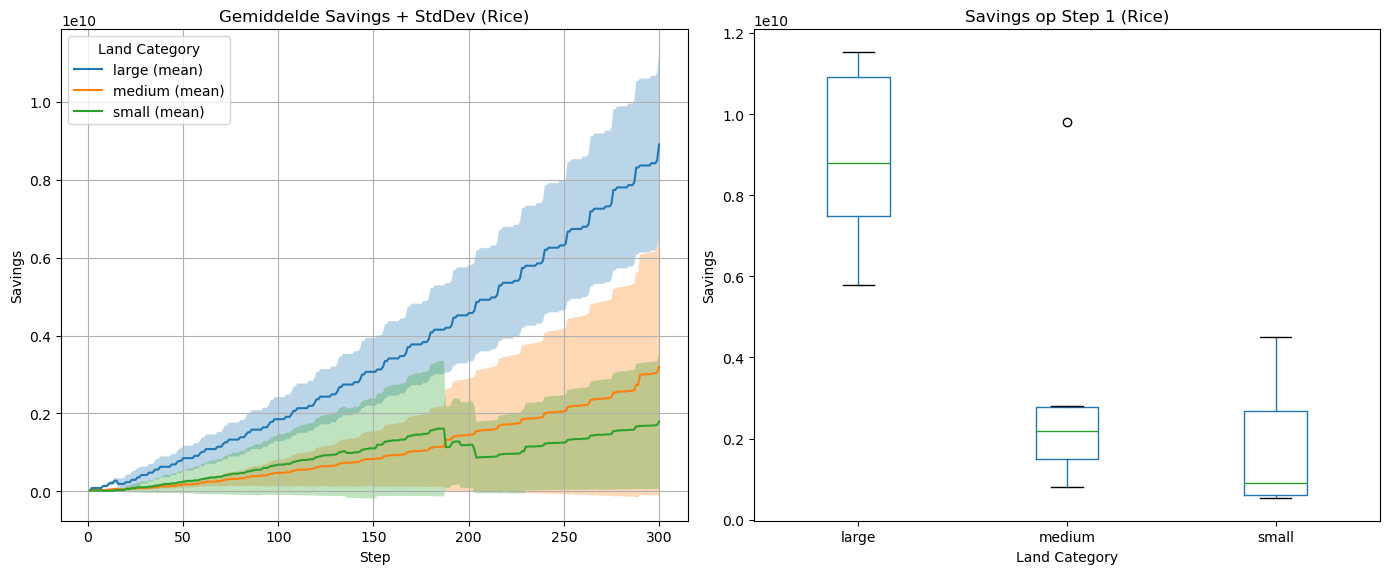

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
iksnaphetniet = agent_data
# Zorg dat 'Step' een kolom is
iksnaphetniet = iksnaphetniet.reset_index()

# Filter alleen Rice agents
rice_df = iksnaphetniet[iksnaphetniet["Crop_type"] == "Rice"]

# ➤ A. Tijdreeksplot met standaarddeviatie
mean_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].mean().unstack()
std_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].std().unstack()

# mean_savings = mean_savings.loc[mean_savings.index <= ]
# std_savings = std_savings.loc[std_savings.index <= 49]

# ➤ B. Boxplot van alleen Step 1
rice_step12 = rice_df[rice_df["Step"] == 300]

# ➤ Plot beide in één figuur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Plot A: Lijnplot met shaded std
for category in mean_savings.columns:
    mean = mean_savings[category]
    std = std_savings[category]
    
    ax1.plot(mean.index, mean.values, label=f"{category} (mean)")
    ax1.fill_between(mean.index, mean - std, mean + std, alpha=0.3)

ax1.set_title("Gemiddelde Savings + StdDev (Rice)")
ax1.set_xlabel("Step")
ax1.set_ylabel("Savings")
ax1.legend(title="Land Category")
ax1.grid(True)

# Plot B: Boxplot op step 1
rice_step12.boxplot(column="Savings", by="Land_category", grid=False, ax=ax2)
ax2.set_title("Savings op Step 1 (Rice)")
ax2.set_xlabel("Land Category")
ax2.set_ylabel("Savings")
plt.suptitle("")  # Verwijder standaardtitel van pandas boxplot

plt.tight_layout()
plt.show()


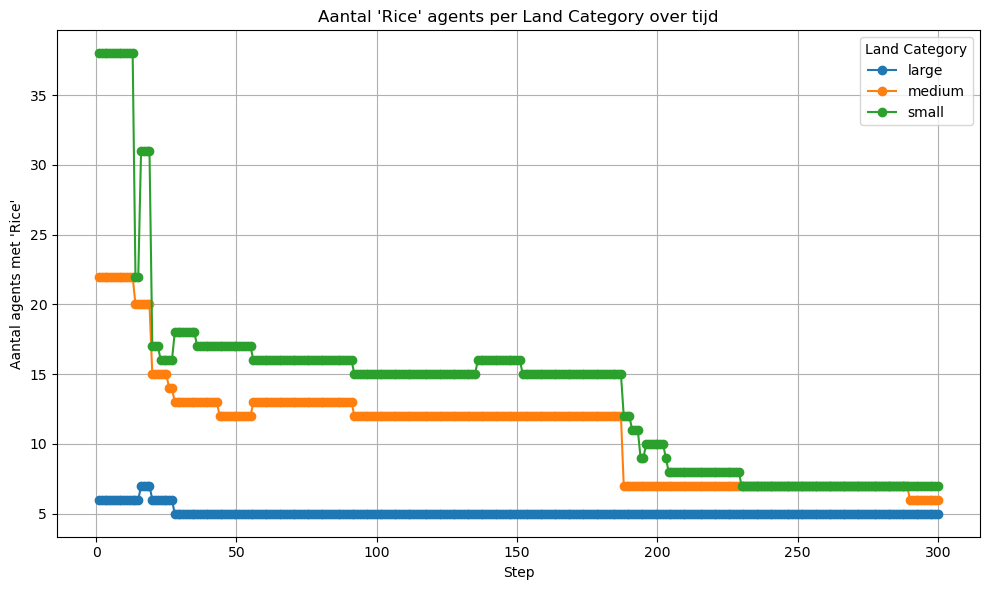

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
agent_counter = agent_data
# Stap 1: Zet index goed
df = agent_counter.reset_index()

# Stap 2: Filter alleen Rice-agents
rice_df = df[df["Crop_type"] == "Rice"]

# Stap 3: Groepeer op Step en Land_category, tel aantal agents
rice_counts = rice_df.groupby(["Step", "Land_category"])["AgentID"].count().unstack(fill_value=0)

# Stap 4: Plot
plt.figure(figsize=(10, 6))
for category in rice_counts.columns:
    plt.plot(rice_counts.index, rice_counts[category], label=category, marker='o')

plt.title("Aantal 'Rice' agents per Land Category over tijd")
plt.xlabel("Step")
plt.ylabel("Aantal agents met 'Rice'")
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()



In [8]:
agent_landless = agent_data[agent_data['too low income'].notna()]

agent_landless = agent_landless[agent_landless['too low income']==1]
agent_landless = agent_landless.reset_index()

agent_landless['Year'] = agent_landless['Step']//12

agent_landless = agent_landless.groupby('Year').size().reset_index(name="Too low income count")
agent_landless

,Year,Too low income count
0,0,1120
1,1,776
2,2,412
3,3,456
4,4,456
5,5,456
6,6,440
7,7,440
8,8,432
9,9,472


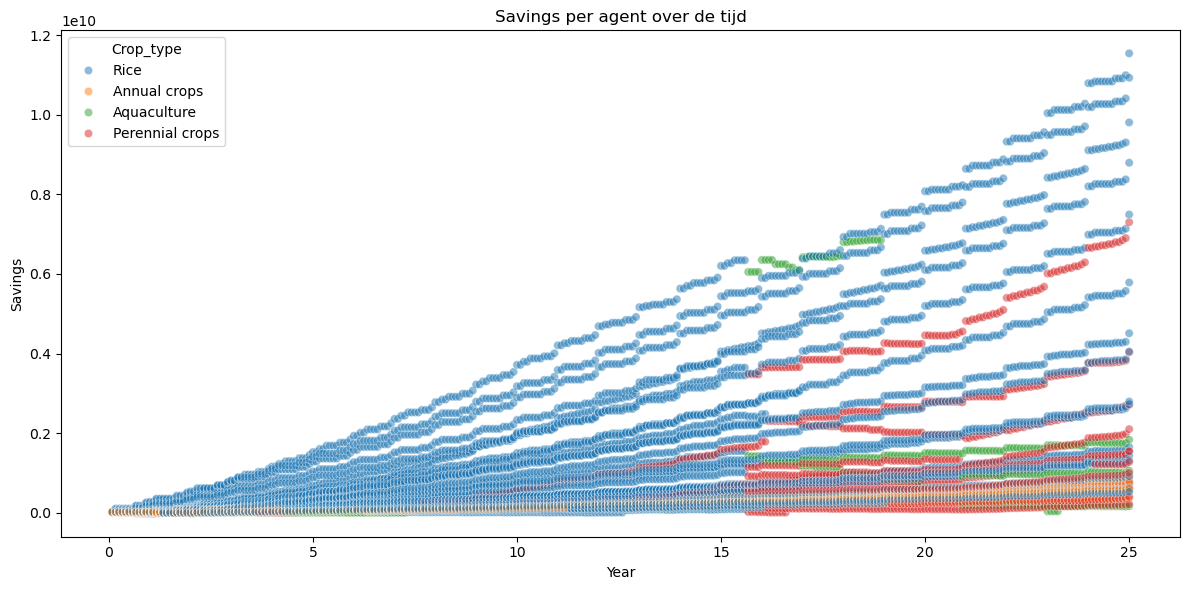

In [9]:
# agent_savings = agent_savings[agent_savings['Crop_type'].notna()]


agent_savings = agent_savings.reset_index() 
agent_savings['Year'] = agent_savings['Step'] / 12

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=agent_savings, x='Year', y='Savings', hue='Crop_type', alpha=0.5)
plt.title("Savings per agent over de tijd")
plt.ylabel("Savings")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [10]:
ww_data = agent_data
ww_data = ww_data[ww_data['Number_of_wage_workers'].notna()]
ww_data

Crop_type Land_category       Savings  too low income  \
Step AgentID                                                                
2    1001                Rice         small  2.052319e+07             NaN   
     1002                Rice         small  2.216671e+07             NaN   
     1003                Rice         large  6.085474e+07             NaN   
     1007                Rice         large  9.883799e+07             NaN   
     1010                Rice         large  9.286346e+07             NaN   
...                       ...           ...           ...             ...   
300  1092                Rice         large  1.153919e+10             NaN   
     1098                Rice         small  4.047027e+09             NaN   
     1102     Perennial crops         small  3.990234e+08             NaN   
     1103                Rice         large  7.490449e+09             NaN   
     1105                Rice         small  5.260884e+08             NaN   

              Number_of_wage_workers  
Step AgentID                          
2    1001                        4.0  
     1002                        0.0  
     1003                       67.0  
     1007                      153.0  
     1010                      138.0  
...                              ...  
300  1092                      195.0  
     1098                       24.0  
     1102                        0.0  
     1103                      120.0  
     1105                        7.0  

[14389 rows x 5 columns]

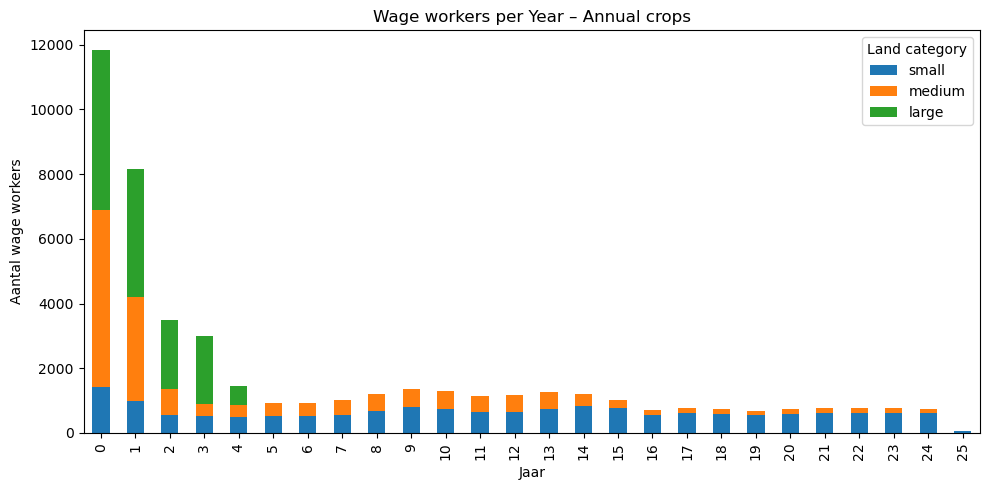

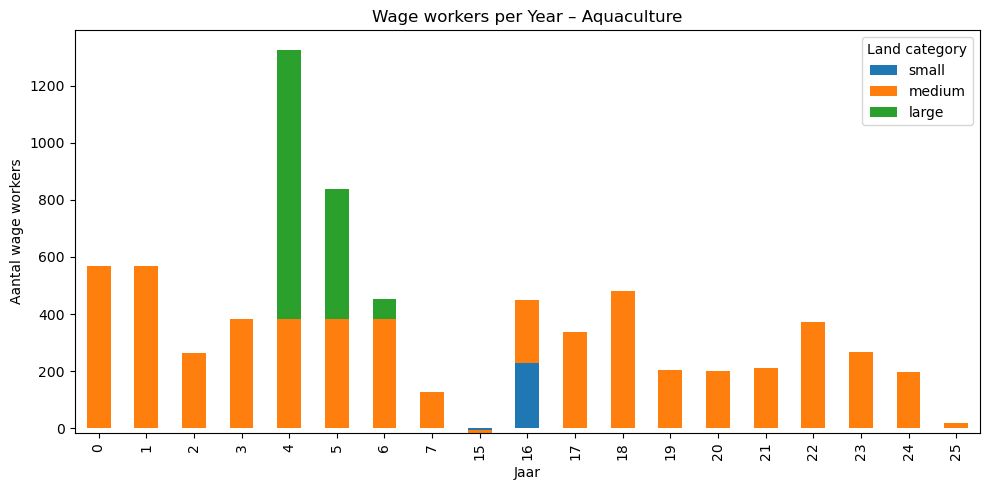

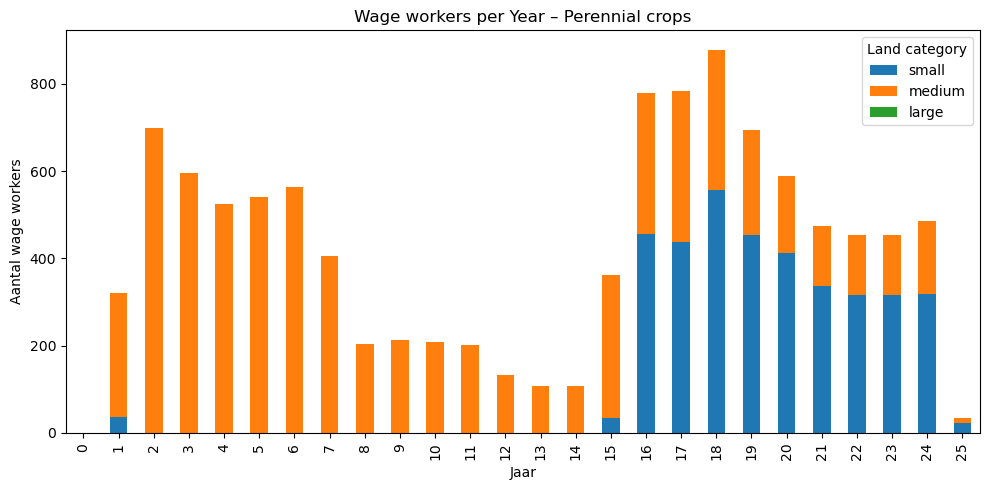

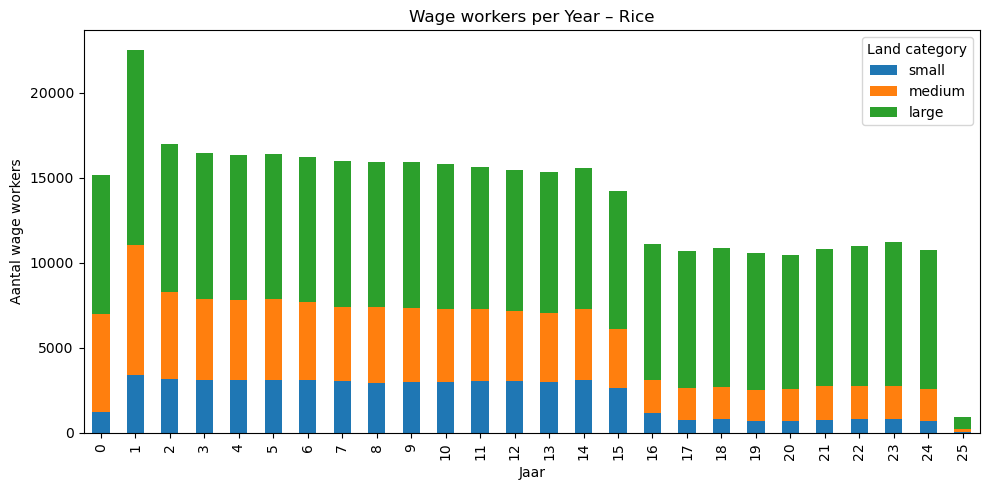

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Voeg kolom toe: Jaar = Step // 12
df = df.reset_index()
df['Year'] = df['Step'] // 12

# Groepeer per jaar i.p.v. per maand
pivot_data = df.groupby(
    ['Year', 'Crop_type', 'Land_category']
)['Number_of_wage_workers'].sum().reset_index()

# Kies vaste kleuren per land category
land_colors = {
    'small': '#1f77b4',     # blauw
    'medium': '#ff7f0e',    # oranje
    'large': '#2ca02c'      # groen
}

# Unieke land_categories in je data
unique_categories = pivot_data['Land_category'].unique()

# Zorg dat alle land categories in alle crops worden weergegeven
for crop in pivot_data['Crop_type'].unique():
    subset = pivot_data[pivot_data['Crop_type'] == crop]

    # Pivot voor stacked bars
    pivot = subset.pivot(index='Year', columns='Land_category', values='Number_of_wage_workers').fillna(0)

    # Voeg ontbrekende kolommen toe (als bepaalde land_category niet voorkomt bij dit crop)
    for cat in land_colors:
        if cat not in pivot.columns:
            pivot[cat] = 0

    # Zorg voor vaste kolomvolgorde
    pivot = pivot[list(land_colors.keys())]

    # Plot
    pivot.plot(
        kind='bar',
        stacked=True,
        color=[land_colors[cat] for cat in pivot.columns],
        figsize=(10, 5),
        title=f"Wage workers per Year – {crop}",
        ylabel='Aantal wage workers',
        xlabel='Jaar'
    )
    plt.legend(title='Land category')
    plt.tight_layout()
    plt.show()


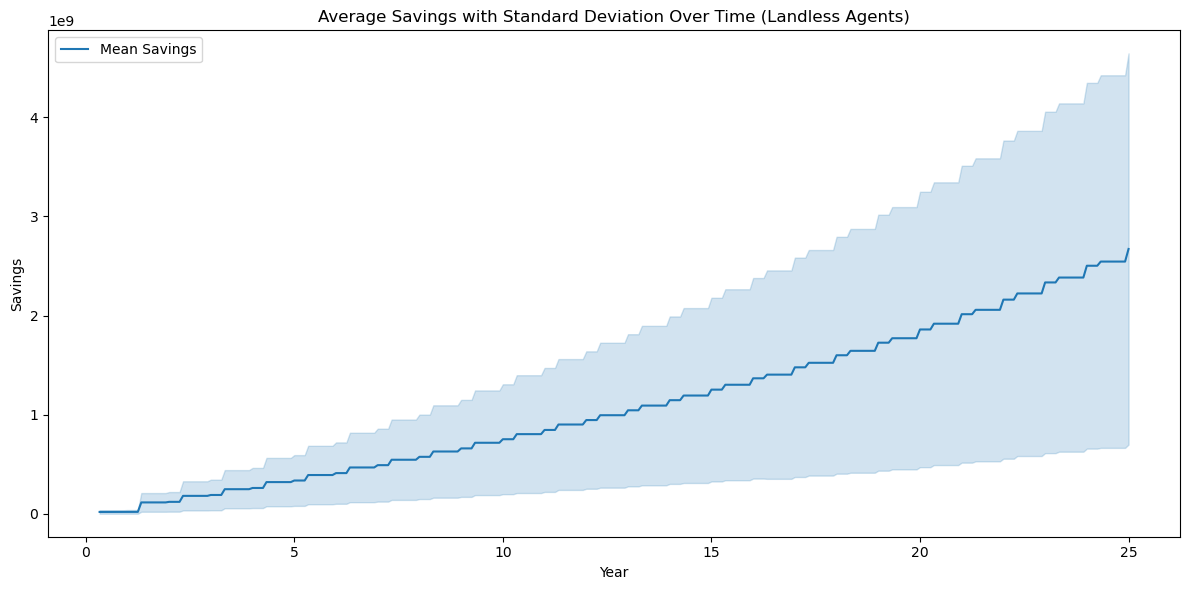

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter landless agents
landless_savings = agent_data[agent_data['too low income'].notna()].reset_index()
landless_savings['Year'] = landless_savings['Step'] / 12


# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=landless_savings,
    x="Year",
    y="Savings",
    errorbar='sd',  
    estimator="mean",
    label="Mean Savings",
    ci="sd"  
)

plt.title("Average Savings with Standard Deviation Over Time (Landless Agents)")
plt.xlabel("Year")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()



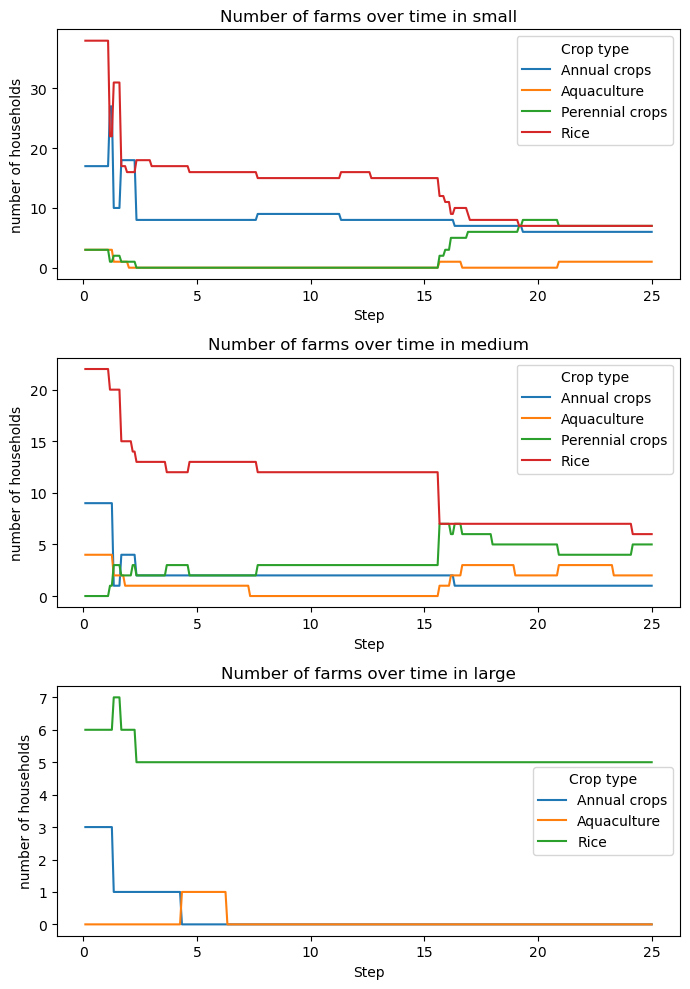

In [14]:
agent_data_crops_per_land = agent_data[agent_data['Crop_type'].notna()]
agent_data_crops_per_land

fig, axes = plt.subplots(nrows = 3, ncols= 1, figsize = (7,10))

for i, category in enumerate(['small', 'medium', 'large']):
    subsets = agent_data_crops_per_land[agent_data_crops_per_land["Land_category"]==category]
    if len(subsets) > 0:
        subsets = subsets.reset_index()
        subsets = subsets.groupby(['Step', "Crop_type"]).size().reset_index(name = "count")
        subsets = subsets.pivot(index = "Step", columns = "Crop_type", values = "count").fillna(0)
        subsets.index = subsets.index / 12
        subsets.plot(ax=axes[i])
        axes[i].set_title(f"Number of farms over time in {category}")
        axes[i].set_ylabel("number of households")
        axes[i].legend(title = "Crop type")
    
plt.xlabel("Step")
plt.tight_layout()
plt.show()

# agent_data_crops_per_land = agent_data_crops_per_land.reset_index().groupby(['Step', "Crop_type", "Land_category"]).size().reset_index(name = "count")
# agent_data_crops_per_land.plot(kind="line", figsize = (10,6))
#
# plt.title("Crop type distribution over time")
# 

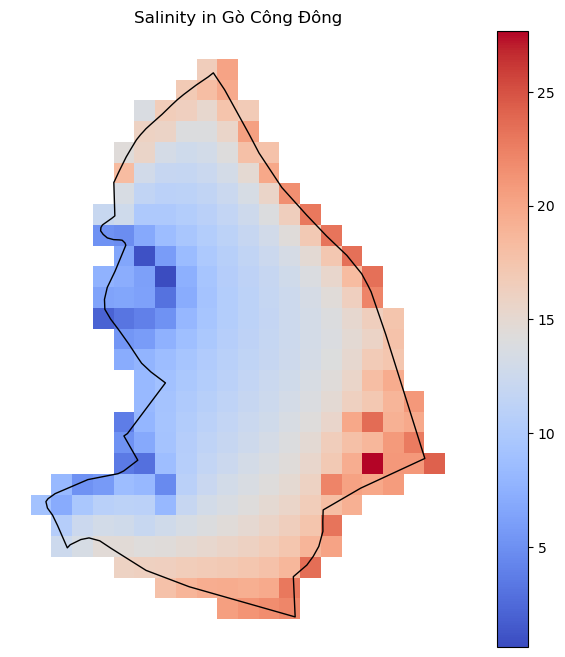

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title(f"Salinity in {model.district}")
plt.axis("off")
plt.show()

Aantal nodes per crop_type:
Annual crops: 29
Aquaculture: 7
Rice: 66
Perennial crops: 3
Unknown: 0
Aantal nodes per crop_type:
Annual crops: 7
Aquaculture: 3
Rice: 18
Perennial crops: 12
Unknown: 0


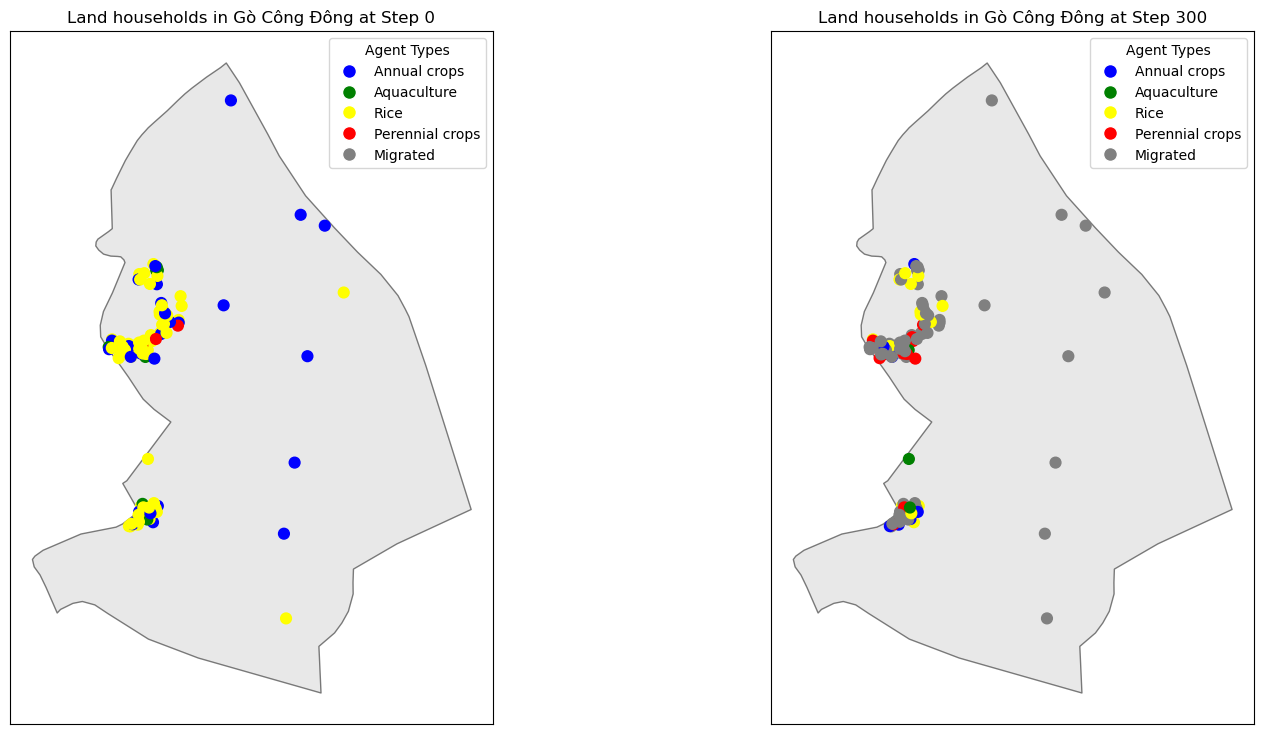

In [16]:
from Model3 import Large_land_households, Middle_land_households, Small_land_households
from collections import Counter

def plot_network(ax, model):
    ax.clear()

    # Map node_id to agent
    node_to_agent = {agent.node_id: agent for agent in model.agents if isinstance(agent, (Large_land_households, Middle_land_households, Small_land_households))}
    
    # Tellen crop_types
    crop_counts = Counter()
    for agent in node_to_agent.values():
        crop = agent.crop_type
        if crop is not None:
            crop_counts[crop] += 1
        else:
            crop_counts['Unknown'] += 1

    print("Aantal nodes per crop_type:")
    for crop_type in ["Annual crops", "Aquaculture", "Rice", "Perennial crops", "Unknown"]:
        print(f"{crop_type}: {crop_counts.get(crop_type, 0)}")

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')

    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.crop_type == "Annual crops":
                colors_to_draw.append('blue')
            elif agent.crop_type == "Aquaculture":
                colors_to_draw.append('green')
            elif agent.crop_type == "Rice":
                colors_to_draw.append('yellow')
            elif agent.crop_type == "Perennial crops":
                colors_to_draw.append('red')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent

    # Draw edges first (optioneel)
    # nx.draw_networkx_edges(model.G, pos, ax=ax, edge_color="gray")

    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Annual crops')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Aquaculture')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Rice')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Perennial crops')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Migrated')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Land households in {model.district} at Step {model.steps}", fontsize=12)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()

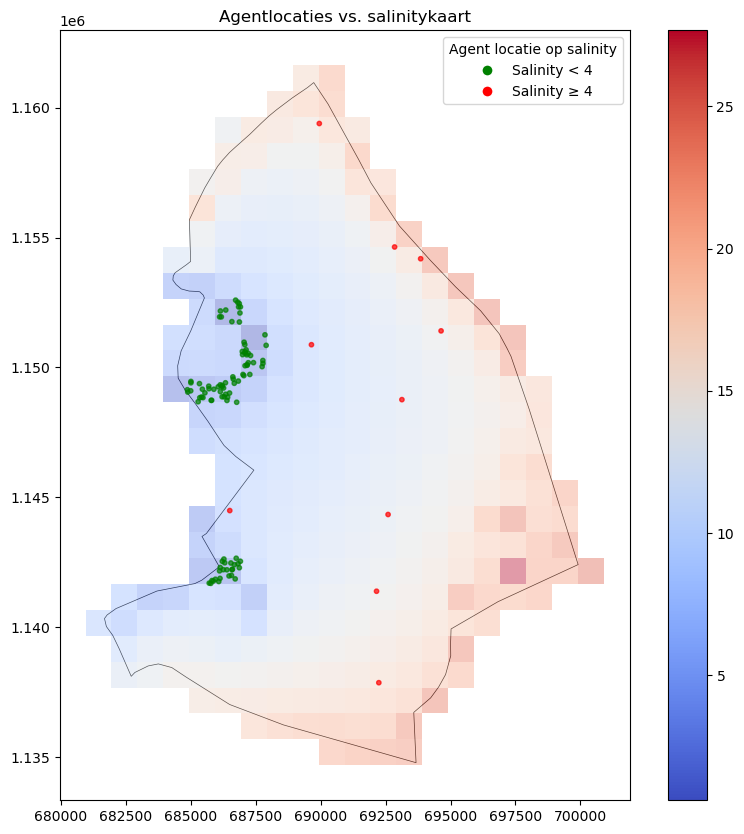

In [17]:
import matplotlib.pyplot as plt
from shapely.geometry import Point


# Verzamel salinity, posities en crop_type per node
positions = nx.get_node_attributes(model.G, "pos")
salinities = nx.get_node_attributes(model.G, "salinities")
crop_types = nx.get_node_attributes(model.G, "crop_type")  # als je dit hebt opgeslagen

# Maak lijst van punten (als shapely Point) en bijbehorende salinity
points = []
sals = []
colors = []

for node_id, (x, y) in positions.items():
    sal = salinities.get(node_id)
    crop = crop_types.get(node_id, "None")
    if sal is not None:
        points.append(Point(x, y))
        sals.append(sal)
        # Kleur op basis van salinity
        if sal < 4:
            colors.append("green")
        else:
            colors.append("red")

fig, ax = plt.subplots(figsize=(10, 10))

# Plot de districten en salinity polygonen
model.polygon_districts.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)
model.data_salinity.plot(column="Salinity", cmap="coolwarm", legend=True, ax=ax, alpha=0.4)

# Plot je agents als scatter
xs = [pt.x for pt in points]
ys = [pt.y for pt in points]

ax.scatter(xs, ys, c=colors, s=10, alpha=0.7, label="Agents")

# Optionele legenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Salinity < 4', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Salinity ≥ 4', markerfacecolor='red', markersize=8)
]
ax.legend(handles=legend_elements, title="Agent locatie op salinity")
ax.set_title("Agentlocaties vs. salinitykaart")

plt.show()


In [18]:
# Haal alle salinities op als lijst
all_salinities = list(salinities.values())

# Tellen
low_salinity_count = sum(1 for s in all_salinities if s is not None and s < 4)
high_salinity_count = sum(1 for s in all_salinities if s is not None and s >= 4)

# Printen
print(f"Aantal nodes met salinity < 4 : {low_salinity_count}")
print(f"Aantal nodes met salinity ≥ 4 : {high_salinity_count}")
print(f"Totaal aantal nodes met geldige salinity: {low_salinity_count + high_salinity_count}")
print(f"Totaal aantal nodes in netwerk: {len(salinities)}")


Aantal nodes met salinity < 4 : 95
Aantal nodes met salinity ≥ 4 : 10
Totaal aantal nodes met geldige salinity: 105
Totaal aantal nodes in netwerk: 105
